# Another Problem Solution using Decision tree

In [1]:
import  pandas as pd

df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
inputs=df.drop('Outcome',axis='columns')
target=df.Outcome

In [3]:
inputs.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split             # Train Test split
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [17]:
len(X_train)

614

In [18]:
len(X_test)

154

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)  # Gini criteria decision tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [22]:
model.score(X_test,y_test)     # Accuracy 76.62%

0.7662337662337663

In [23]:
y_predicted = model.predict(X_test)  # Predicted values for my all test data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)  # Truth Values & Predicted Values as parameter
cm

array([[80, 18],
       [18, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

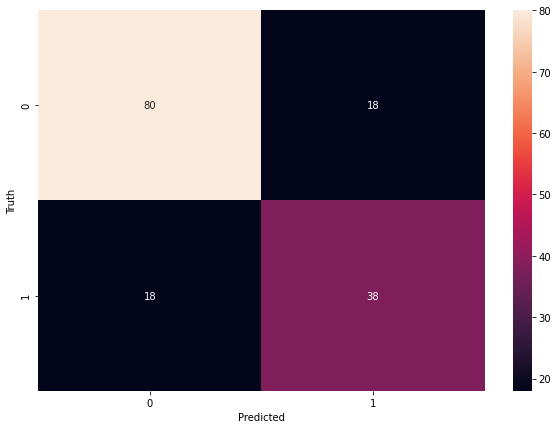

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)  # Using Heatmap
plt.xlabel('Predicted')
plt.ylabel('Truth')

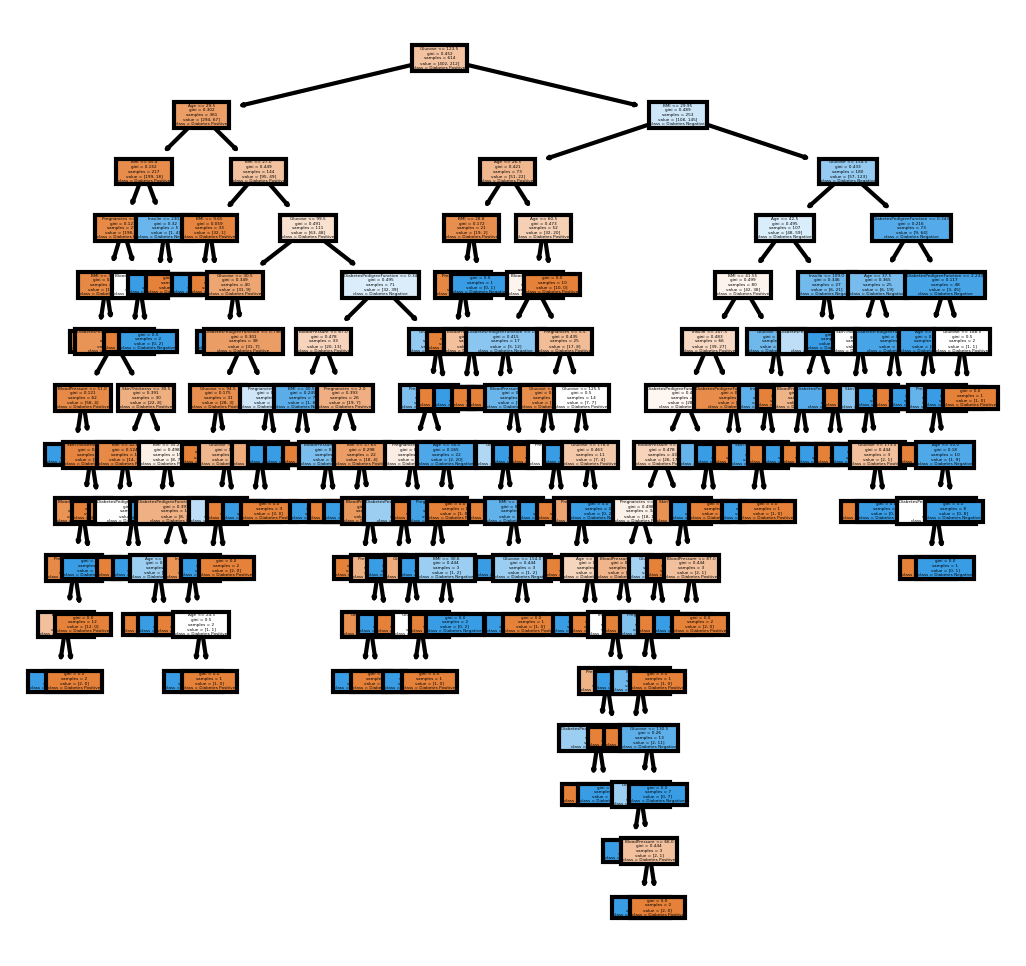

In [25]:
feature=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
clss=['Diabetes Positive', 'Diabetes Negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4 ,4), dpi=300)
tree.plot_tree(model,
               feature_names = feature, 
               class_names=clss,
               filled = True);
fig.savefig('diabetes_tree.png')